In [1]:
import rnavigate as rnav
import fragmap as fm

# TODO list
1. Profiles are based only on two samples, consider simplifying pre-processing.
   FragMaP would then be a subclass of SHAPEMaP, much simpler.
2. Applying Std_err to Modified_rate may not be appropriate.
3. Try z-scores based on log(lnz)-log(met) rates
4. Try eliminating outliers from z-score calculation.

In [2]:
common_data = rnav.Sample(
    '6HA1 - LSU',
    fasta='./example_data/6HA1_LSU.fasta',
    pdb={'filepath': './example_data/6HA1_LSU.pdb',
         'seq_source': 'fasta',
         'chain': 'A'},
    ss='./example_data/6HA1_LSU.json'
)
qn = rnav.Sample(
    'quinoxiline',
    inherit=common_data,
    shapemap='./example_data/2_QN_DMSO_subtracted_LSU_profile.txt'
)
lnz = rnav.Sample(
    'linezolid',
    inherit=common_data,
    shapemap='./example_data/2_ZLD_DMSO_subtracted_LSU_profile.txt'
)
met = rnav.Sample(
    'methyl',
    inherit=common_data,
    shapemap='./example_data/2_Methyl_DMSO_subtracted_LSU_profile.txt'
)
qn_fm = fm.Fragmapper(qn, met, parameters={'correction_method': None})
lnz_fm = fm.Fragmapper(lnz, met, parameters={'correction_method': None})

(<Figure size 504x504 with 1 Axes>,
 <AxesSubplot:xlabel='methyl Modified_rate', ylabel='quinoxiline Modified_rate'>)

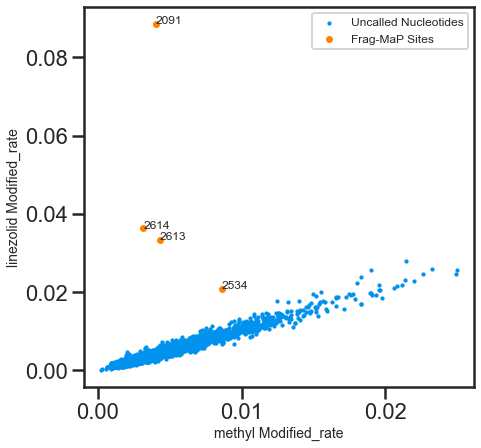

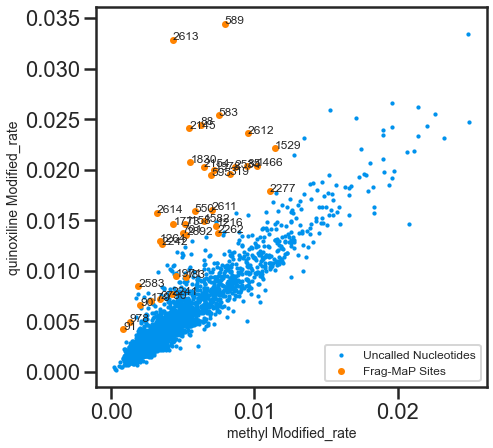

In [3]:
lnz_fm.plot_scatter()
qn_fm.plot_scatter()

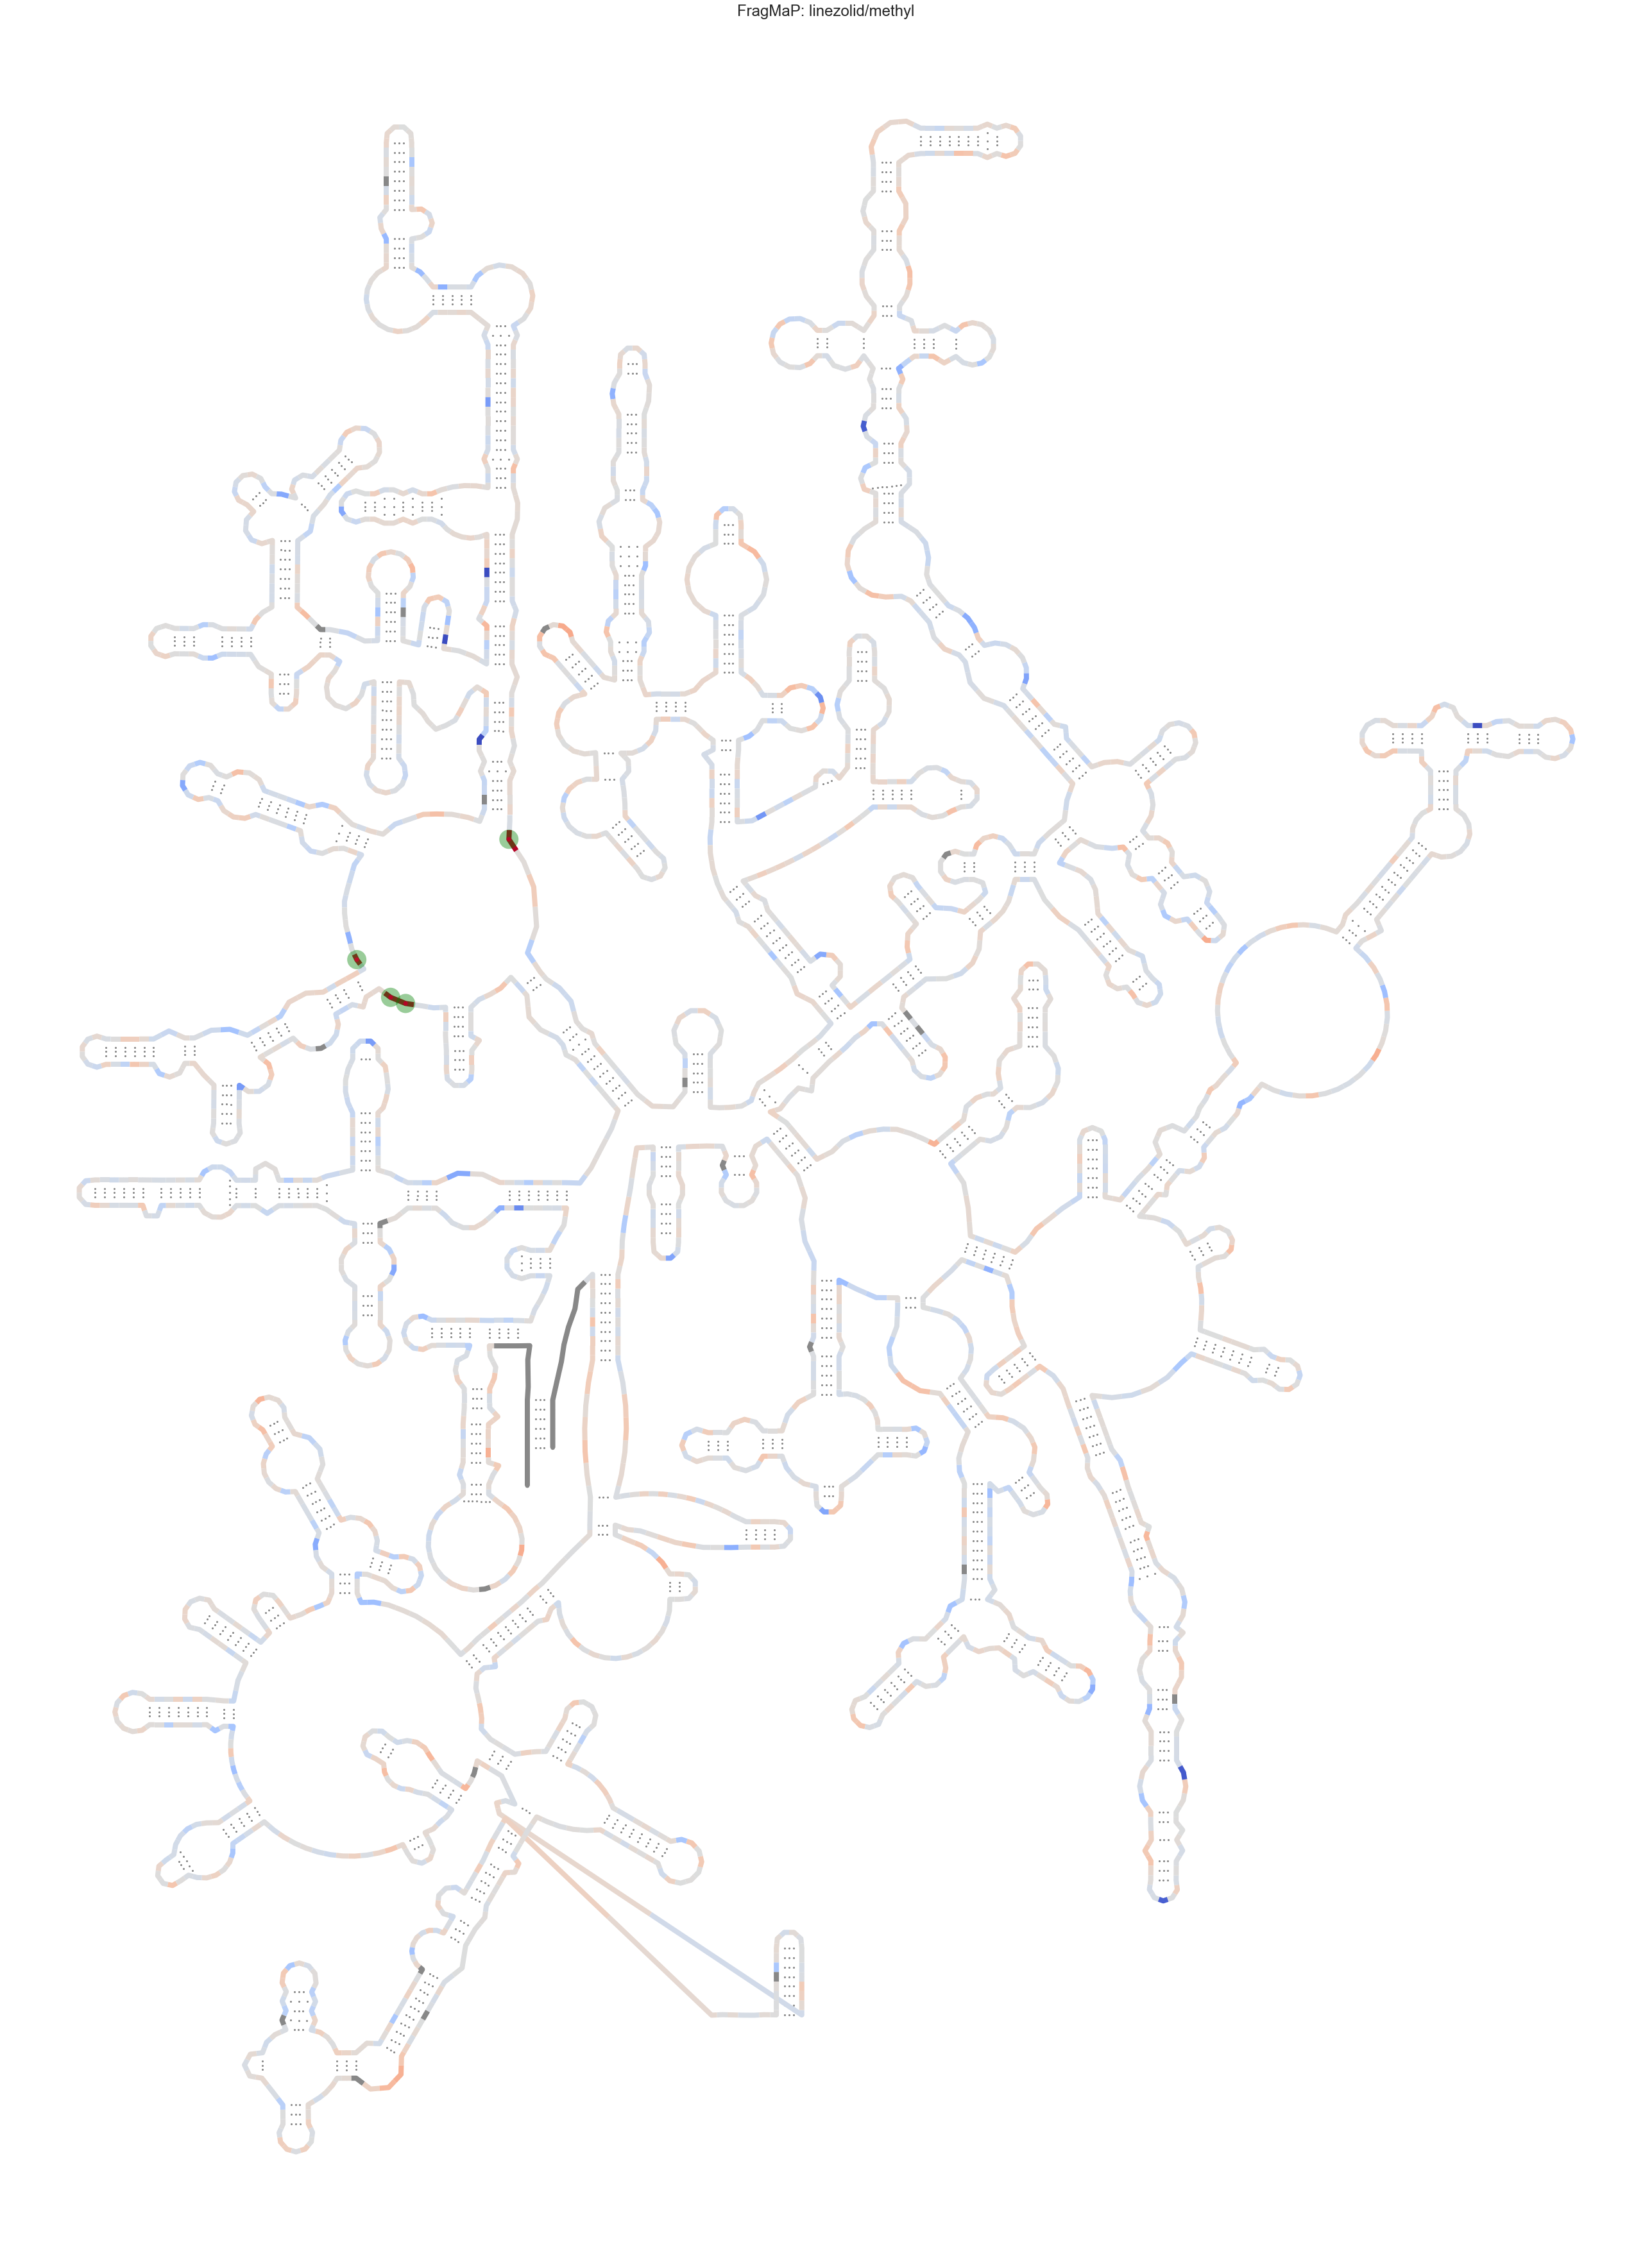

In [4]:
common_data.data['ss'].xcoordinates *= -1
common_data.data['ss'].ycoordinates *= -1
plot = rnav.plot_ss(
    [lnz_fm],
    profile='fragmap',
    colors='profile',
    apply_color_to='structure',
    annotations=['fragmap_sites'],
    plot_kwargs={'structure_lw': 8})